In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

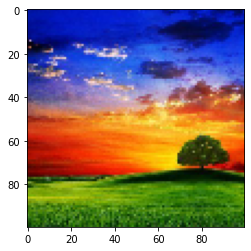

In [2]:
inputImg = plt.imread('CroppedResizedImage.png')[:,:,:3]
plt.imshow(inputImg)
plt.show()

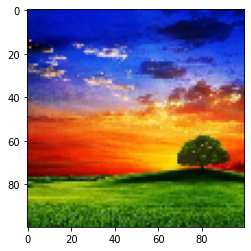

In [3]:
RGBIMag = inputImg.copy()
RGBIMag = RGBIMag*255.0
RGBIMag = RGBIMag.astype(np.uint8)

plt.imshow(RGBIMag)
plt.show()

In [4]:
def RGBtoYUV444(Rin, Gin, Bin):
    Yout = 0.299*Rin + 0.587*Gin + 0.114*Bin
    Uout = -0.147*Rin - 0.289*Gin + 0.436*Bin
    Vout = 0.615*Rin - 0.515*Gin - 0.1*Bin
    return {'Y' : Yout, 'U' : Uout, 'V' : Vout}

In [5]:
YUV444fromFormula = np.zeros((RGBIMag.shape))
Y444fromFormula = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))
U444fromFormula = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))
V444fromFormula = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))

for i in range(RGBIMag.shape[0]):
    for j in range(RGBIMag.shape[1]):
        YUVfrom444 = RGBtoYUV444(RGBIMag[i,j,0], RGBIMag[i,j,1], RGBIMag[i,j,2])
        Y444fromFormula[i,j] = YUVfrom444['Y']
        U444fromFormula[i,j] = YUVfrom444['U']
        V444fromFormula[i,j] = YUVfrom444['V']
        YUV444fromFormula[i,j, :] = np.asarray([YUVfrom444['Y'], YUVfrom444['U'], YUVfrom444['V']])

In [6]:
def YUV444toRGB(Yin, Uin, Vin):
    Rout = Yin + 1.13983*Vin
    Gout = Yin - 0.39465*Uin - 0.5806*Vin
    Bout = Yin + 2.03211*Uin
    return {'R' : Rout, 'G' : Gout, 'B' : Bout}

In [7]:
RGBfromFormula = np.zeros((RGBIMag.shape))
RfromFormula = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))
GfromFormula = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))
BfromFormula = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))

for i in range(RGBIMag.shape[0]):
    for j in range(RGBIMag.shape[1]):
        RGBfrom = YUV444toRGB(YUV444fromFormula[i,j, 0], YUV444fromFormula[i,j, 1], YUV444fromFormula[i,j, 2])
        RfromFormula[i,j] = RGBfrom['R']
        GfromFormula[i,j] = RGBfrom['G']
        BfromFormula[i,j] = RGBfrom['B']        

In [8]:
RGBfromFormula[:,:, 0] = RfromFormula
RGBfromFormula[:,:, 1] = GfromFormula
RGBfromFormula[:,:, 2] = BfromFormula

RGBfromFormula =RGBfromFormula

In [9]:
RGBfromFormula.max(), RGBfromFormula.min()

(255.00044579999994, -0.021822499999998968)

In [10]:
RGBfromFormula[RGBfromFormula<0] = 0
RGBfromFormula[RGBfromFormula>255] = 255

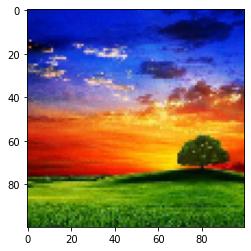

In [11]:
plt.imshow(RGBfromFormula/255.0)
plt.show()

0.05988501999999585


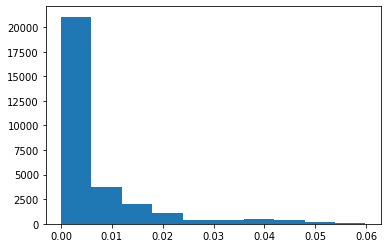

In [12]:
err = abs(RGBIMag.astype(float)-RGBfromFormula.astype(float))
print(err.max())
plt.hist(err.flatten())
plt.show()

In [13]:
iY = Y444fromFormula
iU = cv2.resize(U444fromFormula, (U444fromFormula.shape[0]//2, U444fromFormula.shape[0]//2))
iV = cv2.resize(V444fromFormula, (V444fromFormula.shape[0]//2, V444fromFormula.shape[0]//2))

In [14]:
R = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))
G = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))
B = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))

indUV, jndUV = 0,0
for indY in range(RGBIMag.shape[0]):
# for indY in range(6):
    indUV = indY>>1
    for jndY in range(RGBIMag.shape[1]):
        jndUV = jndY>>1


        # print(indY, jndY, indUV, jndUV)
        # print(iY[indY,jndY], iU[indUV,jndUV], iV[indUV,jndUV])
        rgb2 = YUV444toRGB(iY[indY,jndY], iU[indUV,jndUV], iV[indUV,jndUV])
        R[indY, jndY], G[indY, jndY], B[indY, jndY] = rgb2['R'], rgb2['G'], rgb2['B']   
    

255.0 0.0
81.176941425 287


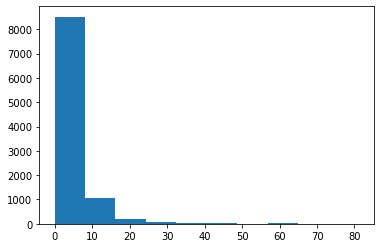

In [35]:
errR = abs(R.astype(float) - RGBIMag[:,:,0].astype(float))
print(R.max(), R.min())
print(errR.max(), np.sum(errR>20))
plt.hist(errR.flatten())
plt.show()

239.01601349999996 0.0
36.023037375 60


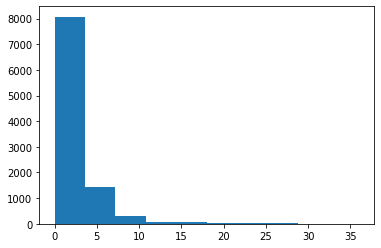

In [36]:
errG = abs(G.astype(float) - RGBIMag[:,:,1].astype(float))
print(G.max(), G.min())
print(errG.max(), np.sum(errG>20))
plt.hist(errG.flatten())
plt.show()

255.0 0.0
209.7516780975 9160


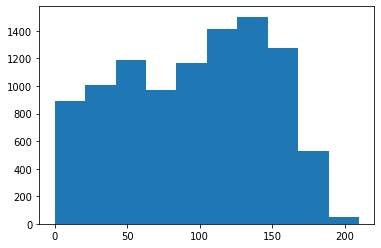

In [37]:
errB = abs(B.astype(float) - RGBIMag[:,:,1].astype(float))
print(B.max(), B.min())
print(errB.max(), np.sum(errB>20))
plt.hist(errB.flatten())
plt.show()

In [38]:
R[R>255] = 255
G[G>255] = 255
B[B>255] = 255
R[R<0] = 0
G[G<0] = 0
B[B<0] = 0

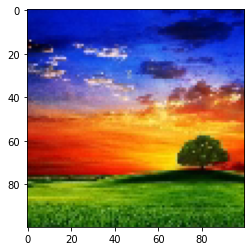

In [31]:
sofwareOutput = np.zeros((RGBIMag.shape))
sofwareOutput[:,:,0] = R
sofwareOutput[:,:,1] = G
sofwareOutput[:,:,2] = B

plt.imshow(sofwareOutput/255)
plt.show()

91.49647716499999 992


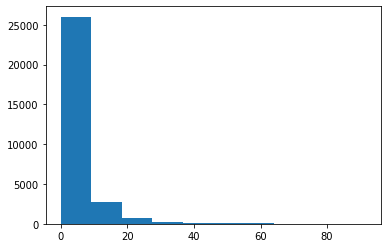

In [41]:
err = abs(sofwareOutput.astype(float) - RGBIMag.astype(float))
print(err.max(), np.sum(err>20))
plt.hist(err.flatten())
plt.show()